<a href="https://colab.research.google.com/github/mochammadfarkhan/rusantara/blob/machine-learning/Rusantara_TransferLearning_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengimport library yang dipakai

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
import pathlib
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Memuat Dataset

In [46]:
train_data_dir = "/content/gdrive/MyDrive/rusantara/CleanData"

BATCH_SIZE = 32
IMG_SIZE = (320, 320)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2) # set validation split (20 persen)

# training dataset 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training') # set as training data

# validation dataset
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation') # set as validation data

Found 404 images belonging to 3 classes.
Found 99 images belonging to 3 classes.


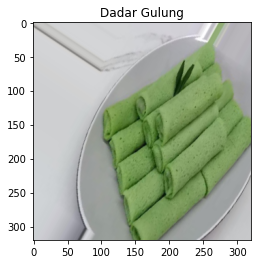

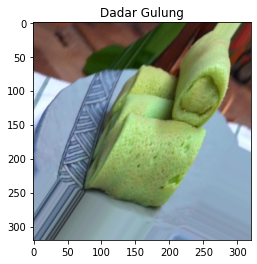

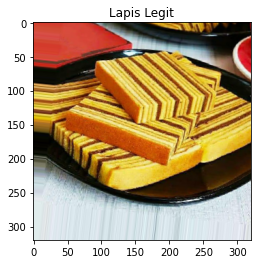

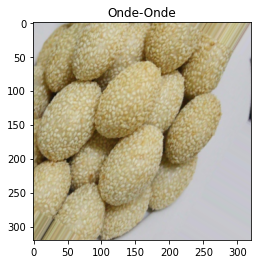

In [58]:
class_names = ["Dadar Gulung", "Lapis Legit","Onde-Onde"]

x,y = validation_generator.next()
for i in range(4):
    image = x[i]
    label = y[i]
    plt.title(class_names[int(label)])
    plt.imshow(image)
    plt.show()

# menggunakan model transfer learning

In [48]:
from tensorflow.keras.applications.inception_v3 import InceptionV3


In [49]:
pretrained_model = InceptionV3(input_shape = (320, 320, 3),
                                include_top = False,
                                weights = 'imagenet')

In [50]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [51]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 18, 18, 768)


In [52]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)                  
x = tf.keras.layers.Dense(3, activation='softmax')(x)

In [53]:
model2 = tf.keras.Model(pretrained_model.input, x)
model2.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model2.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 159, 159, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 159, 159, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [54]:
history = model2.fit(train_generator, 
                     epochs=20, 
                     steps_per_epoch=10, 
                     validation_data=validation_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/20
10/10 [==============================] - 85s 8s/step - loss: 6.1340 - accuracy: 0.4838 - val_loss: 1.0452 - val_accuracy: 0.5833
Epoch 2/20
10/10 [==============================] - 80s 8s/step - loss: 0.6638 - accuracy: 0.7468 - val_loss: 0.4527 - val_accuracy: 0.7917
Epoch 3/20
10/10 [==============================] - 82s 8s/step - loss: 0.3082 - accuracy: 0.8781 - val_loss: 0.2376 - val_accuracy: 0.9062
Epoch 4/20
10/10 [==============================] - 80s 8s/step - loss: 0.1534 - accuracy: 0.9448 - val_loss: 0.1960 - val_accuracy: 0.9375
Epoch 5/20
10/10 [==============================] - 80s 8s/step - loss: 0.1439 - accuracy: 0.9383 - val_loss: 0.0712 - val_accuracy: 0.9688
Epoch 6/20
10/10 [==============================] - 82s 8s/step - loss: 0.1102 - accuracy: 0.9594 - val_loss: 0.1618 - val_accuracy: 0.9583
Epoch 7/20
10/10 [==============================] - 80s 8s/step - loss: 0.0910 - accuracy: 0.9740 - val_loss: 0.0731 - val_accuracy: 0.9792
Epoch 8/20
10/10 [==

# PREDICT LAPIS LEGIT


/content/gdrive/MyDrive/rusantara/TestData/lapis legit/1.jpg
[[0. 1. 0.]]


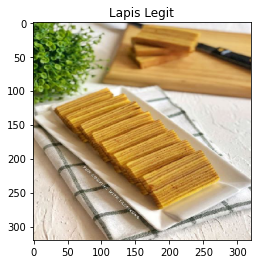

/content/gdrive/MyDrive/rusantara/TestData/lapis legit/2.jpg
[[0. 1. 0.]]


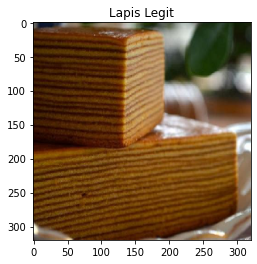

/content/gdrive/MyDrive/rusantara/TestData/lapis legit/3.jpg
[[0. 1. 0.]]


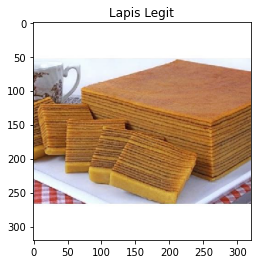

In [55]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

for i in range(1, 4):
  path = "/content/gdrive/MyDrive/rusantara/TestData/lapis legit/" + str(i) + ".jpg"
  # path = validation_generator[0]
  img = load_img(path, target_size=(320, 320))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=32)
  print(path)
  print(classes)

  i_class = np.argmax(classes[0])
  plt.title(class_names[i_class])
  plt.imshow(img)
  plt.show()
  

# PREDICT Onde onde


/content/gdrive/MyDrive/rusantara/TestData/onde onde/1.jpg
[[0. 1. 0.]]


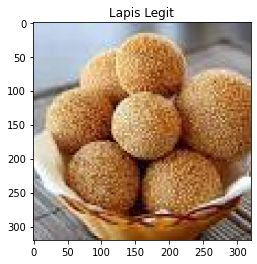

/content/gdrive/MyDrive/rusantara/TestData/onde onde/2.jpg
[[0. 1. 0.]]


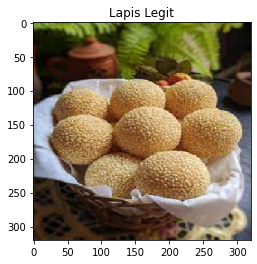

In [56]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

for i in range(1, 3):
  path = "/content/gdrive/MyDrive/rusantara/TestData/onde onde/" + str(i) + ".jpg"
  # path = validation_generator[0]
  img = load_img(path, target_size=(320, 320))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=32)
  print(path)
  print(classes)

  i_class = np.argmax(classes[0])
  plt.title(class_names[i_class])
  plt.imshow(img)
  plt.show()
  


# predict dadar gulung

/content/gdrive/MyDrive/rusantara/TestData/dadar gulung/1.jpg
[[0. 1. 0.]]


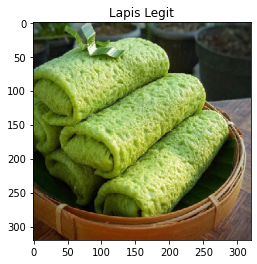

/content/gdrive/MyDrive/rusantara/TestData/dadar gulung/2.jpg
[[0. 1. 0.]]


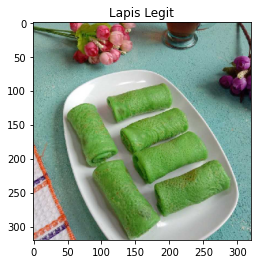

/content/gdrive/MyDrive/rusantara/TestData/dadar gulung/3.jpg
[[0. 1. 0.]]


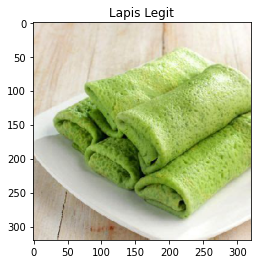

In [57]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

for i in range(1, 4):
  path = "/content/gdrive/MyDrive/rusantara/TestData/dadar gulung/" + str(i) + ".jpg"
  # path = validation_generator[0]
  img = load_img(path, target_size=(320, 320))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=32)
  print(path)
  print(classes)

  i_class = np.argmax(classes[0])
  plt.title(class_names[i_class])
  plt.imshow(img)
  plt.show()
  